
A notebook for visualizing the outcome of Reinforcement Learning for TSP
==============
    
<font color=#000000 size=3 face="黑体">  This notebook can be used to test and train a pointer network to solve TSP.
Structure of networks and function for training and searching is in the package call TSP_pytorch. The version of pytorch used in the packages is 1.0

In [1]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
from TSP_network import *
from TSP_train import *
from TSP_env import *
%matplotlib inline

The following code use newtwork before training to solve TSP and visualizing the outcome.

mean_length_before_training:tensor(29.8057)
length_real_of_picture_before_training:[24.086168 21.472664]
est_real_of_picture_before_training:[-0.03796547 -0.03751399]


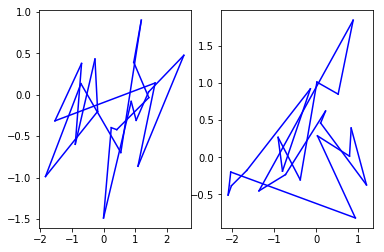

In [27]:
ptr_net=Ptr_Net(hidden_size=128, embedding_size=128,dropout_p=0)
critic_net=Critic_Net()
ptr_net.apply(weights_init)
critic_net.apply(weights_init)
points=get_point(100,20,2)
#data visualization before training
roads=ptr_net.get_road(points)
print('mean_length_before_training:'+str(torch.mean(get_length_sum(points,roads))))
print('length_real_of_picture_before_training:'+str(get_length_sum(points,roads).numpy()[0:2]))
print('est_real_of_picture_before_training:'+str(critic_net(points).detach().numpy()[0:2]))
draw(points,roads)

the followiing code load a network trained after 10000 iter.

In [24]:
ptr_net_trained=torch.load('train_deacy_ptr9.pkl')
critic_net_trained=torch.load('train_deacy_critic9.pkl')

You can see the outcome after training by the following code

mean_length_before_training:tensor(19.0244)
length_real_of_picture_before_training:[15.587549 19.403425]
est_real_of_picture_before_training:[16.274183 17.163214]


array([[ 7,  5, 10, 16,  6, 19, 18,  3, 12, 14, 17, 13,  1,  2,  0, 15,
        11,  8,  4,  9],
       [14,  9, 16,  7, 17, 15, 13,  1, 10,  8, 12,  0,  3,  4,  5,  2,
        18, 19,  6, 11]])

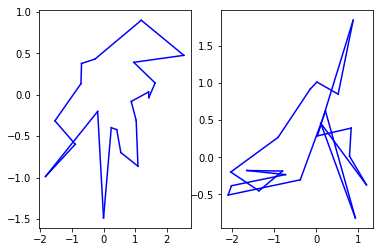

In [28]:
roads=ptr_net_trained.get_road(points)
print('mean_length_before_training:'+str(torch.mean(get_length_sum(points,roads))))
print('length_real_of_picture_before_training:'+str(get_length_sum(points,roads).numpy()[0:2]))
print('est_real_of_picture_before_training:'+str(critic_net_trained(points).detach().numpy()[0:2]))
draw(points[0:2,:,:],roads[0:2,:])
roads[0:2,]

you can also trained the network by yourself. TSP_train.py provide two function for training. Training train the network with constant learning rate and learning_rate_adjusting_train train the network with decaying learning rate

In [ ]:
ptr_net2,critic_net2=training(ptr_net,critic_net,batch=128,city=20,coors=2,lr_c = 0.001,lr_p = 0.001,beta1=0.9,
                    n_baseine_gradient_steps=1,train_steps=1000,show_i_time=10,show_j_time=10,show_j=False,
                            print_training_log=True,log_file_name='train_log_constant.csv')
ptr_net3,critic_net3=learning_rate_adjusting_train(ptr_net,critic_net,batch=128,city=20,coors=2,lr_c_init = 0.001
               ,lr_p_init = 0.001,beta1=0.9,n_baseline_gradient_steps=1,
               train_steps_per_iter=1000,train_iter=10,decay=0.99,
               log_file_name='train_log_decaying')

the following code is the 'Active Search' part in the paper. It use policy gradient to guide the searching. This searching can be used to both pre-trained network and untrain-network. The following code show active search with untrain-network.(In the original paper, it do such kind of searching for 10000 iterations)

0
10
20
30
40
50
60
70
80
90
14.521962143480778


<Figure size 432x288 with 0 Axes>

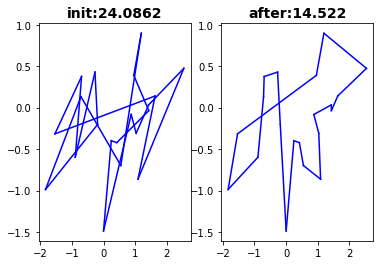

In [30]:
point=points[0]
ptr_net4=active_search(ptr_net,point,batch_size=128,plot_comp=True,plot_mean=True,save_name='search1_',
              log_file_name='search_log.csv',iter_time=100)['ptr_net']

the following code is the 'Active Search' part in the paper. It use policy gradient to guide the searching. This searching can be used to both pre-trained network and untrain-network. The following code show active search with trained network.(In the original paper, it do such kind of searching for 10000 iterations)

0
10
20
30
40
50
60
70
80
90
13.479944609105587


<Figure size 432x288 with 0 Axes>

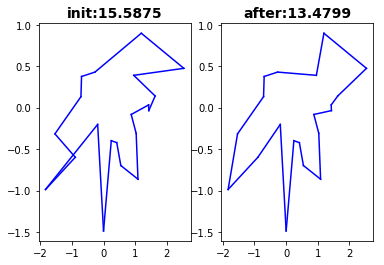

In [32]:
ptr_net5=active_search(ptr_net_trained,point,batch_size=128,plot_comp=True,plot_mean=True,save_name='search1_train_',
              log_file_name='search_train_log.csv',iter_time=100)['ptr_net']

we can compare the solution with the optimal one

12.754250191152096


('good', 12.754250191152096)

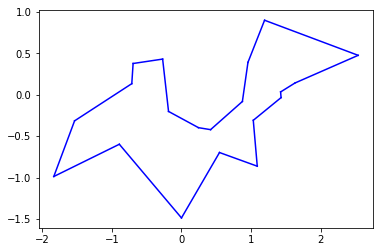

In [31]:
road_opt=opt_road(point)
(draw(point,road_opt),get_length_sum(point,road_opt))

Due to the limitation of devices ,I can only train the network for TSP20. But I can test it on TSP50

mean_length_before_training:tensor(58.0391)
length_real_of_picture_before_training:[57.87213  47.549053]
est_real_of_picture_before_training:[0.02464712 0.02477493]


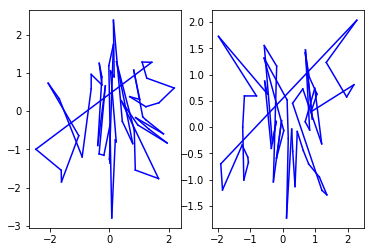

In [33]:
ptr_net50=Ptr_Net(hidden_size=128, embedding_size=128,dropout_p=0)
critic_net50=Critic_Net()
ptr_net50.apply(weights_init)
critic_net50.apply(weights_init)
points50=get_point(100,50,2)
#data visualization before training
roads50=ptr_net.get_road(points50)
print('mean_length_before_training:'+str(torch.mean(get_length_sum(points50,roads50))))
print('length_real_of_picture_before_training:'+str(get_length_sum(points50,roads50).numpy()[0:2]))
print('est_real_of_picture_before_training:'+str(critic_net50(points50).detach().numpy()[0:2]))
draw(points50,roads50)

mean_length_before_training:tensor(58.8187)
length_real_of_picture_before_training:[66.45384  48.983013]
est_real_of_picture_before_training:[19.3288   17.549955]


array([[ 0, 41,  6,  1, 35,  4, 28, 20, 24, 31, 29, 47, 38, 18, 44, 49,
         2, 33, 32, 46, 15, 34,  3,  8, 21, 37, 16, 25, 14, 48, 13, 45,
        10,  9, 27, 22, 19, 11, 43, 17, 30,  7, 12, 36, 26,  5, 23, 40,
        39, 42],
       [ 0, 34, 38, 31, 20,  6,  1, 41, 39, 14, 32, 12, 30, 37, 21, 48,
         5,  9, 27, 44, 24,  7, 42,  8, 13, 26, 17, 49, 25, 43, 16, 23,
        29, 40,  2, 10,  4, 11, 28, 18, 33, 19, 46, 36, 47, 15, 22, 45,
        35,  3]])

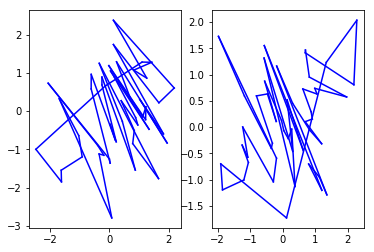

In [34]:
roads50=ptr_net_trained.get_road(points50)
print('mean_length_before_training:'+str(torch.mean(get_length_sum(points50,roads50))))
print('length_real_of_picture_before_training:'+str(get_length_sum(points50,roads50).numpy()[0:2]))
print('est_real_of_picture_before_training:'+str(critic_net_trained(points50).detach().numpy()[0:2]))
draw(points50[0:2,:,:],roads50[0:2,:])
roads50[0:2,]